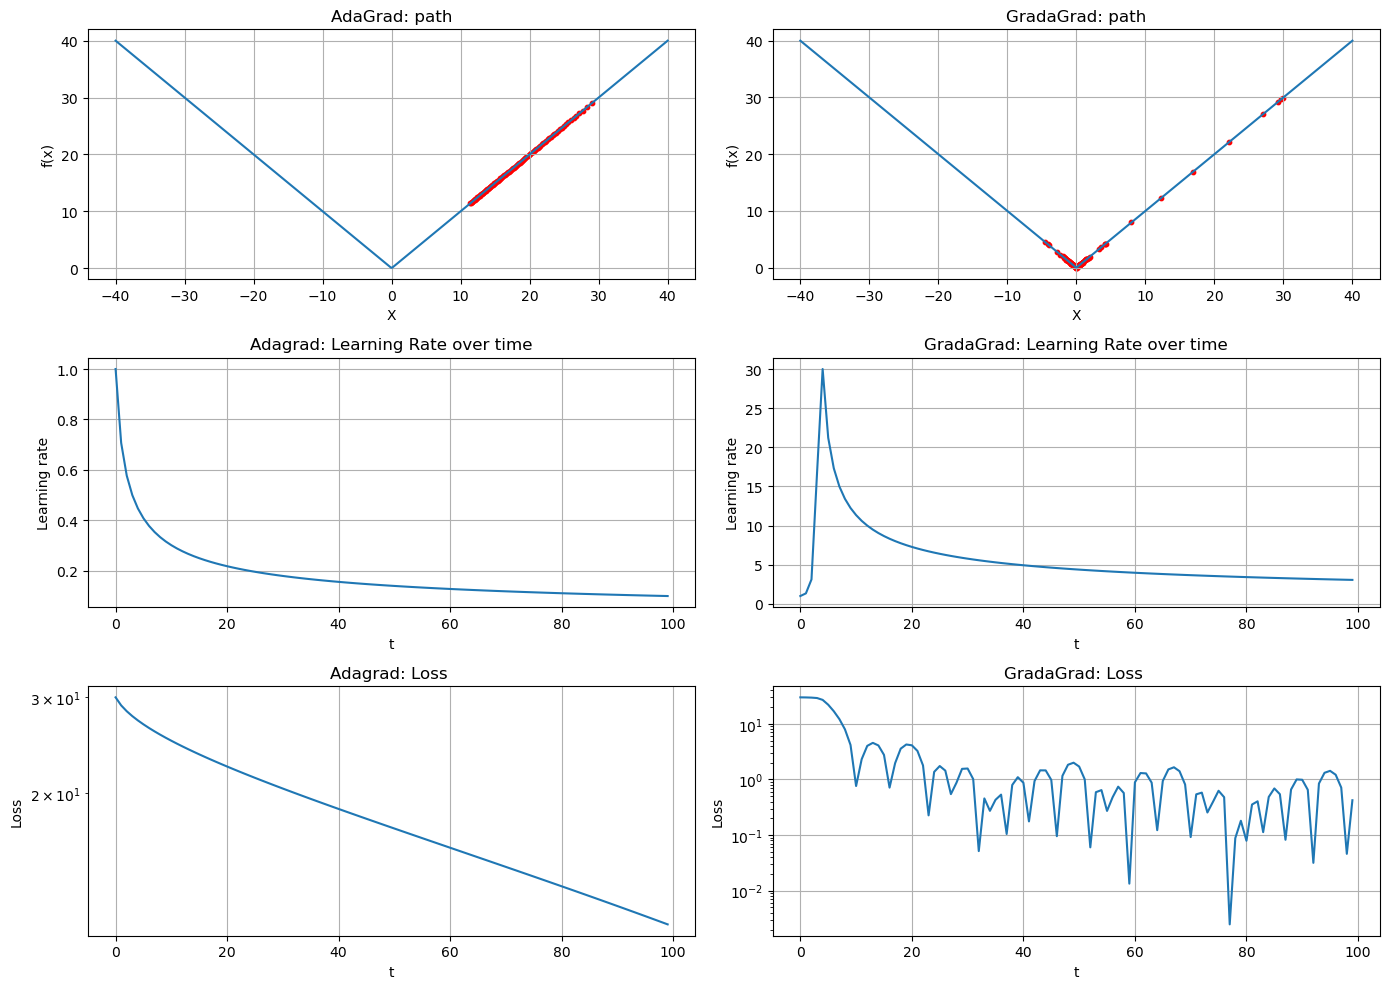

In [35]:
import torch
import import_ipynb
import matplotlib.pyplot as plt
from Adagrad import Adagrad
from GradaGrad import GradaGrad

def f(x):
    return torch.abs(x)

def run_optim_experiment(opt_name, optimizer_class, x_init, steps, **opt_kwargs):
    x = torch.tensor([x_init], requires_grad=True)
    optimizer = optimizer_class([x], **opt_kwargs)
    trajectory = []
    losses = []
    lrs = []

    param_ref = optimizer.param_groups[0]['params'][0]  
    for step in range(steps):
        optimizer.zero_grad()

        loss = f(x)
        loss.backward()
        optimizer.step()

        trajectory.append(x.detach().item())
        losses.append(loss.item())

        if opt_name.lower() == "adagrad":
            state = optimizer.state[param_ref]
            acc = state['accumulator'].sqrt().item()
            eff_lr = opt_kwargs['lr'] / (acc + 1e-10)
        elif opt_name.lower() == "gradagrad":
            state = optimizer.state[param_ref]
            alpha = state['alpha'].sqrt().item()
            gamma_i = state['gamma_i'].item()
            eff_lr = gamma_i / (alpha + 1e-12)
        else:
            eff_lr = 0.0 

        lrs.append(eff_lr)


    return trajectory, losses, lrs


steps = 100
x0 = 30.0  

traj_ada, loss_ada, lr_ada = run_optim_experiment(
    "adagrad", Adagrad, x_init=x0, steps=steps, lr=1)

traj_grada, loss_grada, lr_grada = run_optim_experiment(
    "gradagrad", GradaGrad, x_init=x0, steps=steps, gamma=1, rho=2,G_inf=1,D_inf=30)

fig, axs = plt.subplots(3, 2, figsize=(14, 10))

x_plot = torch.linspace(-40, 40, 500)
axs[0, 0].plot(x_plot, f(x_plot), label='f(x) = |x|')
axs[0, 0].scatter(traj_ada, [abs(v) for v in traj_ada], color='red', s=10)
axs[0, 0].set_title("AdaGrad: path")
axs[0, 0].set_xlabel("X")
axs[0, 0].set_ylabel("f(x)")
axs[0, 0].grid()

axs[0, 1].plot(x_plot, f(x_plot), label='f(x) = |x|')
axs[0, 1].scatter(traj_grada, [abs(v) for v in traj_grada], color='red', s=10)
axs[0, 1].set_title("GradaGrad: path")
axs[0, 1].set_xlabel("X")
axs[0, 1].set_ylabel("f(x)")
axs[0, 1].grid()

axs[1, 0].plot(lr_ada)
axs[1, 0].set_title("Adagrad: Learning Rate over time")
axs[1, 0].set_xlabel("t")
axs[1, 0].set_ylabel("Learning rate")
axs[1, 0].grid()

axs[1, 1].plot(lr_grada)
axs[1, 1].set_title("GradaGrad: Learning Rate over time")
axs[1, 1].set_xlabel("t")
axs[1, 1].set_ylabel("Learning rate")
axs[1, 1].grid()

axs[2, 0].semilogy(loss_ada)
axs[2, 0].set_title("Adagrad: Loss ")
axs[2, 0].set_xlabel("t")
axs[2, 0].set_ylabel("Loss")
axs[2, 0].grid()

axs[2, 1].semilogy(loss_grada)
axs[2, 1].set_title("GradaGrad: Loss ")
axs[2, 1].set_xlabel("t")
axs[2, 1].set_ylabel("Loss")
axs[2, 1].grid()

plt.tight_layout()
plt.show()